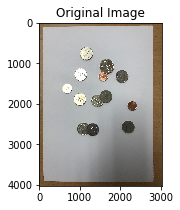

In [115]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('IMG3.jpg')
       
plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

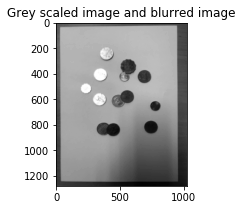

In [116]:
# grey scaled image and blurred image 
imS = cv2.resize(img, (1024, 1280))   
imS = cv2.medianBlur(imS,5)
gray = cv2.cvtColor(imS, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (21, 21), 0)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(gray_blur, cmap='gray')
plt.title('Grey scaled image and blurred image')
plt.show()

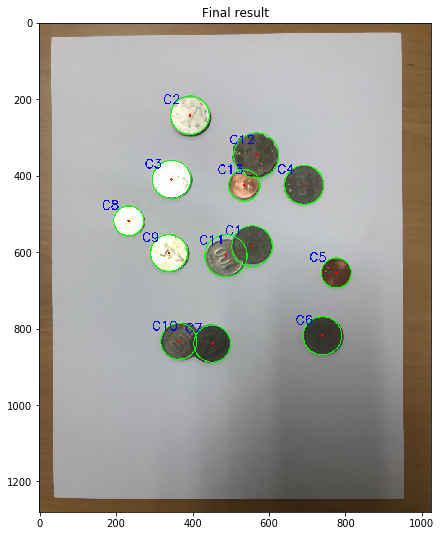

The total number of the coins : 13


In [117]:
circles = cv2.HoughCircles(gray_blur,cv2.HOUGH_GRADIENT,1.1,70,param1=55,param2=33,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
n=1
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(imS,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(imS,(i[0],i[1]),2,(0,0,255),3)
    # add text
    cv2.putText(imS, 'C' + str(n),(i[0]-70,i[1]-30),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),2)
    n+=1

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(imS, cv2.COLOR_BGR2RGB))
plt.title("Final result")
plt.show()

print("The total number of the coins : " + str(circles.shape[1]))